# Задание 1

Библиотеки

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
# Устанавливаем CustomerID в качестве индекса
df.set_index('CustomerID', inplace=True)

Диаграммы

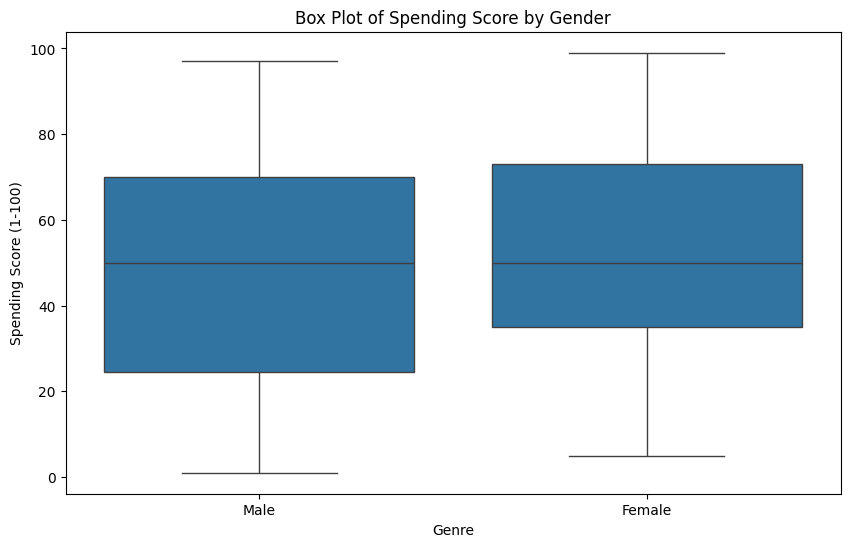

In [20]:
# 1.1. Box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Box Plot of Spending Score by Gender')
plt.show()

Выбросов по признаку гендер не имеется. Это позволяет нам быть уверенными в том, что анализ, проведенный по половой принадлежности клиентов, будет более достоверным и точным.

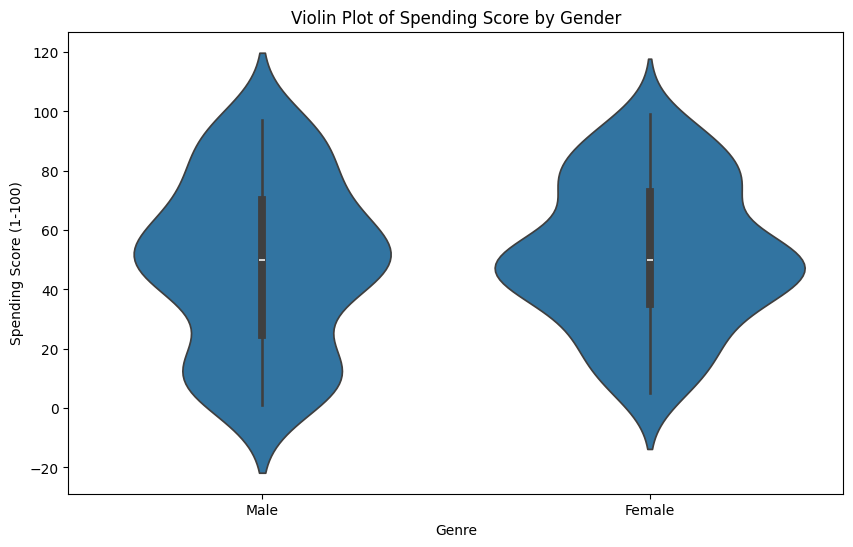

In [21]:
# 1.2. Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Violin Plot of Spending Score by Gender')
plt.show()

Плотность распределения имеет хороший вид, нет сильно преобладающих значений Spending Score, хотя в графике у пола Female, есть зона увеличенной плотности в Spending Score 50. Отсутствие сильно преобладающих значений свидетельствует о том, что нет явно выделенных групп клиентов с определенным уровнем трат.

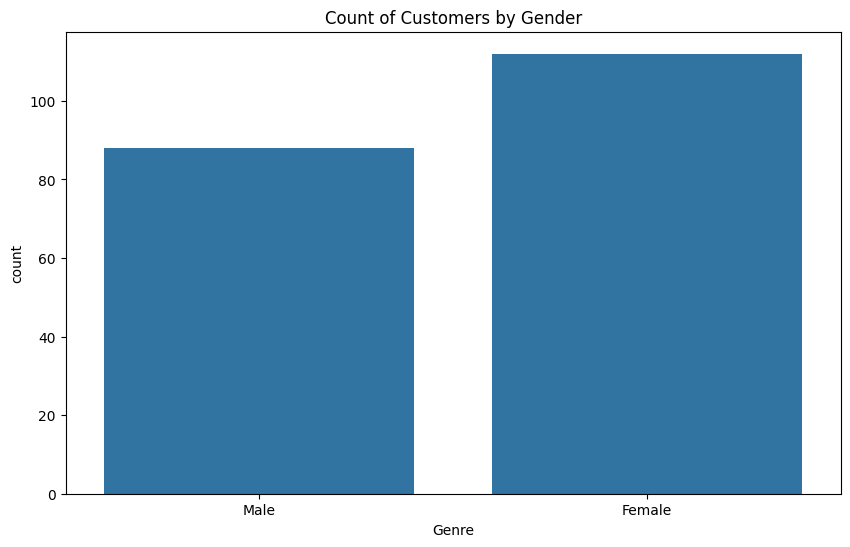

In [22]:
# 1.3. Count plots
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df)
plt.title('Count of Customers by Gender')
plt.show()

Женщин в выборке больке чем мужчин.

<ipython-input-23-52ea379a7d58>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


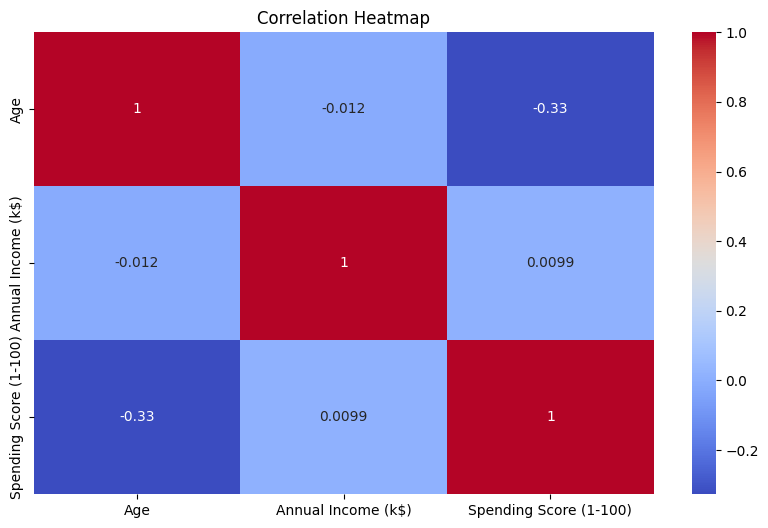

In [23]:
# 1.4. Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Карта корреляций, показывающая что имеется небольшая отрицательная зависимость между признаками Age - Spending Score, но между другими признаками не имеетс никакой линейной связи.

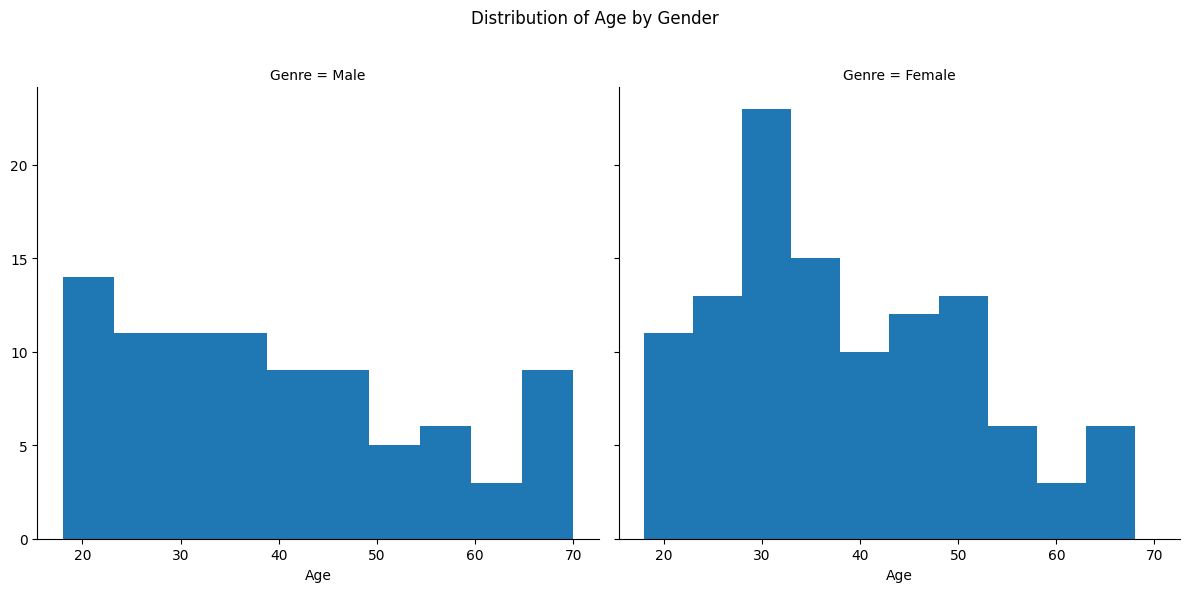

In [24]:
# 1.5. Facet grid
g = sns.FacetGrid(df, col='Genre', height=6)
g.map(plt.hist, 'Age')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Age by Gender')
plt.show()

Распределение возраста мужчин глаже и выглядит поравномернее. Более равномерное распределение возраста у мужчин может указывать на то, что они представлены в магазине более широким диапазоном возрастов

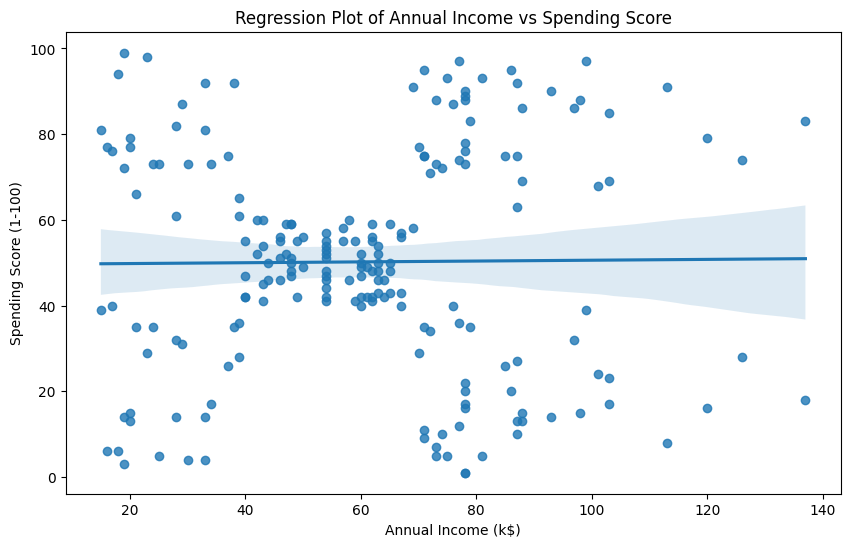

In [25]:
# 1.6. Regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Regression Plot of Annual Income vs Spending Score')
plt.show()

Отсутсвие линейной связи между признаками Annual Income - Spending Score

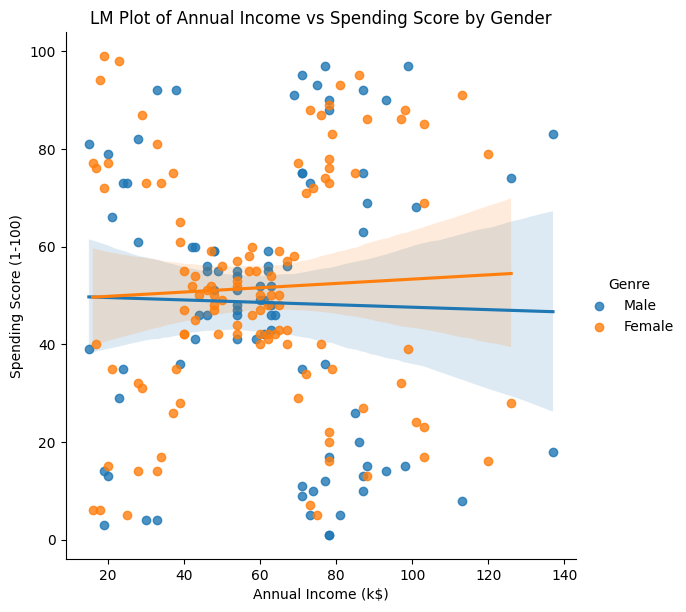

In [26]:
# 1.7. lmplot
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df, height=6)
plt.title('LM Plot of Annual Income vs Spending Score by Gender')
plt.show()

Аналогично отсутсвие линейной связи Annual Income - Spending Score с учетом гендера

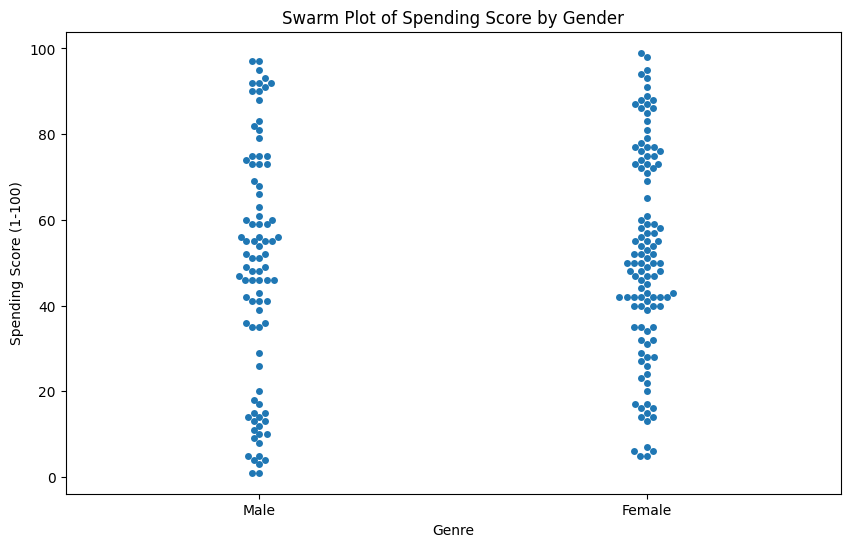

In [27]:
# 1.8. Swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Swarm Plot of Spending Score by Gender')
plt.show()

Видим повышенною плостность распределения у женщин в диапазоне 35-60.

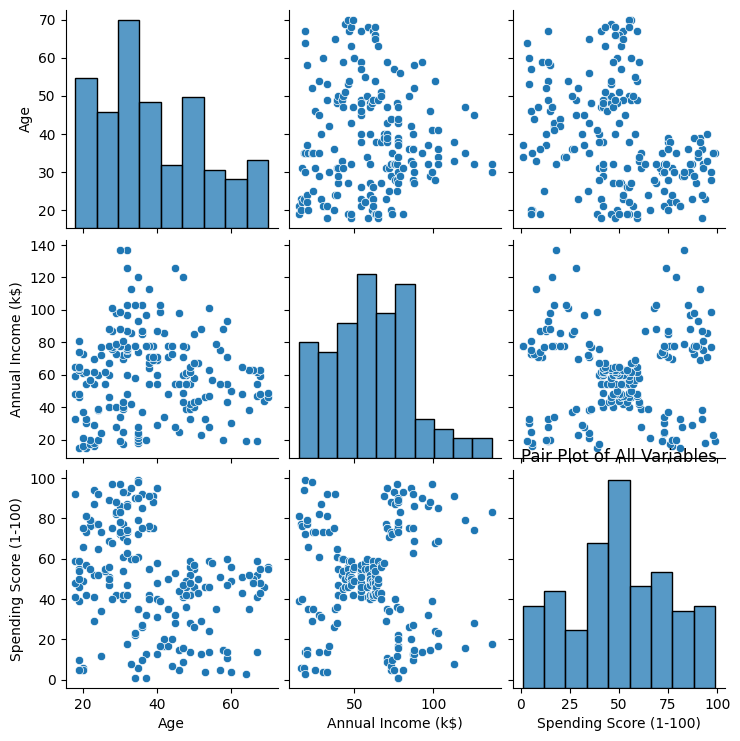

In [28]:
# 1.9. Pair plot
sns.pairplot(df)
plt.title('Pair Plot of All Variables')
plt.show()

Видим отсутсвие какой-либо зависимости между признаками, распределены абсолютно без каких-либо закономерностей.

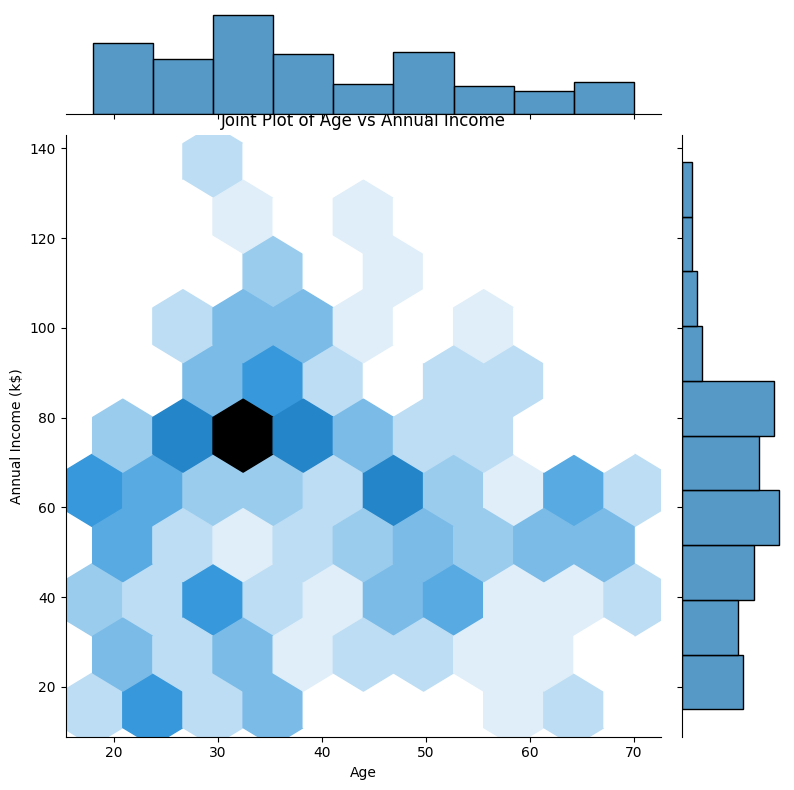

In [29]:
# 1.10. Joint plot
sns.jointplot(x='Age', y='Annual Income (k$)', data=df, kind='hex', height=8)
plt.title('Joint Plot of Age vs Annual Income')
plt.show()

Видим, самый большая плотность Income-Age в диапазоне (70-80) - (30-35)

**Вывод** : эти статистические данные можно использовать в дальнейшей аналитики, потому что выделяя некоторые группы, мы можем вычислить значимые сегменты для магазина(в нашем датасете), что будет плюсом для оптимизации и повышении прибыли, делая акцент на выделенной группе с большей покупательной способностью

# Задание 2

Пишем парсер данных с сайта, данного нам в варианте(4)

In [30]:
url = "https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Germany"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')


table = soup.find('table', {'class': 'wikitable'})
headers = [header.text.strip() for header in table.find_all('th')]

data = []

for row in table.find_all('tr')[1:]:
    cols = row.find_all(['td', 'th'])
    cols = [ele.text.strip() for ele in cols if ele]
    data.append(cols)

df = pd.DataFrame(data, columns=headers[:4])

df['Admissions'] = df['Admissions[1]'].str.replace(',', '').astype(int)
df = df.drop(['Admissions[1]'] , axis = 1)
df

,Rank,Title,Year,Admissions
0,01,The Jungle Book,1968,27290763
1,02,Titanic,1998,18812740
2,03,Once Upon a Time in the West,1969,13012746
3,04,Doctor Zhivago,1966,12750000
4,05,Harry Potter and the Philosopher's Stone,2001,12595323
5,06,Trinity Is Still My Name,1972,12267000
6,07,The Lord of the Rings: The Fellowship of the Ring,2001,11930785
7,08,The Lion King,1994,11899893
8,09,Der Schuh des Manitu,2001,11721183
9,10,Avatar,2009,11311518


Делаем таблицу

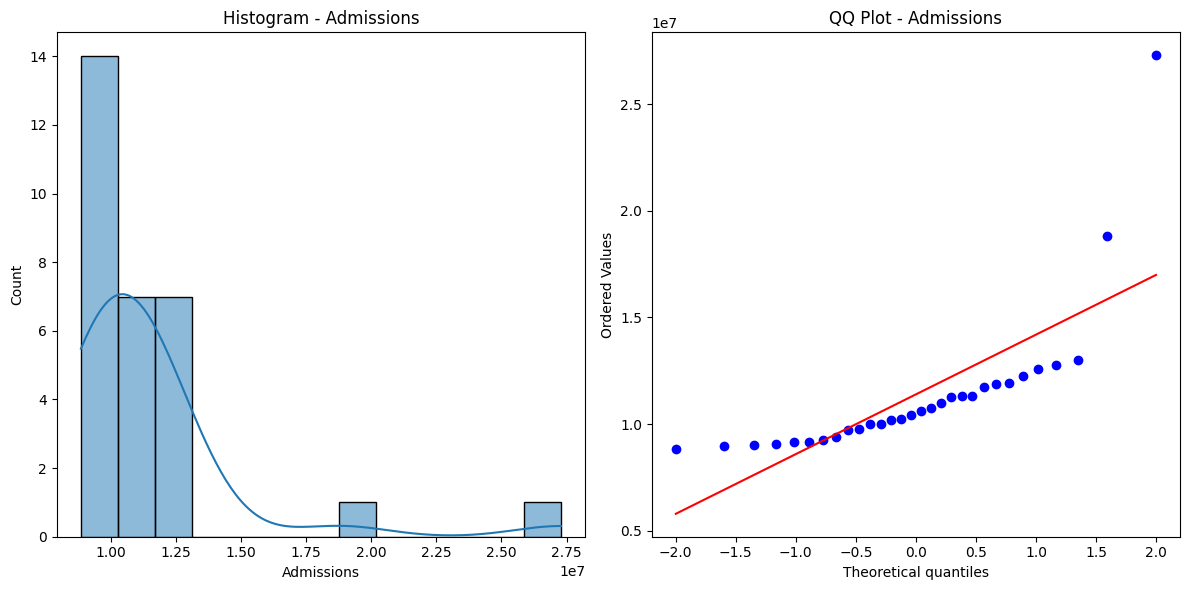

In [31]:
# Гистограмма и QQ-график для колонки "Admissions"
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Гистограмма
sns.histplot(df['Admissions'], kde=True, ax=axs[0])
axs[0].set_title('Histogram - Admissions')

# QQ-график
stats.probplot(df['Admissions'], dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot - Admissions')

plt.tight_layout()
plt.show()

In [32]:
admissions = df['Admissions']

# Тест Шапиро-Уилка
shapiro_test = stats.shapiro(admissions)

# Тест D'Agostino's K^2
dagostino_test = stats.normaltest(admissions)

# Тест Андерсона-Дарлинга
anderson_test = stats.anderson(admissions, dist='norm')

shapiro_test_result = (shapiro_test.statistic, shapiro_test.pvalue)
dagostino_test_result = (dagostino_test.statistic, dagostino_test.pvalue)
anderson_test_result = (anderson_test.statistic, anderson_test.critical_values, anderson_test.significance_level)

In [33]:
results_df = pd.DataFrame({
    "Variable Number": [1],
    "Variable Name": ["Admissions"],
    "Visual Normality Check": ["Histogram and QQ-plot shown above"],
    "Shapiro-Wilk Test (Statistic, p-value)": [shapiro_test_result],
    "D'Agostino's K^2 Test (Statistic, p-value)": [dagostino_test_result],
    "Anderson-Darling Test (Statistic, Critical Values, Significance Levels)": [anderson_test_result]
})

results_df

,Variable Number,Variable Name,Visual Normality Check,"Shapiro-Wilk Test (Statistic, p-value)","D'Agostino's K^2 Test (Statistic, p-value)","Anderson-Darling Test (Statistic, Critical Values, Significance Levels)"
0,1,Admissions,Histogram and QQ-plot shown above,"(0.5932296514511108, 6.040015421149292e-08)","(47.98956727514158, 3.794878465234781e-11)","(3.6282446332893628, [0.521, 0.593, 0.712, 0.8..."


**Вывод**: Визуальная проверка нормальности: Гистограмма и QQ-график были представлены выше и показали значительное отклонение от нормального распределения. Тест Шапиро-Уилка и Тест K^2 -Д'Агостино оба указывают на отклонение от нормальности данных, как видно из очень низких p-значений. Тест Андерсона-Дарлинга также подтверждает ненормальность распределения, с статистикой значительно выше критических значений.

Итог - данные имеют ненормальное распределение

# Задание 3

Аналогично 2 заданию, пишем парсер, чтобы загрузить данные в датафрейм

Вариант 4: Болгария 01.12.2010-01.12.2020

In [34]:
url = "http://pogoda-service.ru/archive_gsod_res.php?country=BU&station=156610&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C"

response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

data = []

for row in soup.find_all('tr'):
    cols = row.find_all('td', class_='td_res')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df = pd.DataFrame(data, columns=['Дата', 'Максимальная температура', 'Минимальная температура', 'Средняя температура', 'Атмосферное давление', 'Скорость ветра', 'Осадки', 'Эффективная температура'])

df = df.iloc[1:].reset_index(drop=True)
df

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,01.12.2010,21.6,12.0,15.6,1005.5,3,0,14.4
1,02.12.2010,23.0,10.2,16.0,1006.1,5,0,13.5
2,03.12.2010,21.0,11.0,14.6,1009.4,3,0,13.0
3,04.12.2010,21.0,13.8,16.8,1005.3,3,0,14.9
4,05.12.2010,18.4,2.4,6.2,1011.8,4,3,2.5
...,...,...,...,...,...,...,...,...
995,22.08.2013,28.0,24.0,25.7,1011.5,5,0,25.1
996,23.08.2013,28.0,18.6,23.5,1010.7,3,0,23.8
997,24.08.2013,27.4,20.0,23.5,1010.7,3,0,24.3
998,25.08.2013,28.0,18.4,23.1,1009.7,3,0,23.9


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Дата                      1000 non-null   object
 1   Максимальная температура  1000 non-null   object
 2   Минимальная температура   1000 non-null   object
 3   Средняя температура       1000 non-null   object
 4   Атмосферное давление      1000 non-null   object
 5   Скорость ветра            1000 non-null   object
 6   Осадки                    1000 non-null   object
 7   Эффективная температура   999 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB


Выполним преобразование типов данных

In [38]:
df['Максимальная температура'] = pd.to_numeric(df['Максимальная температура'], errors='coerce')
df['Минимальная температура'] = pd.to_numeric(df['Минимальная температура'], errors='coerce')
df['Средняя температура'] = pd.to_numeric(df['Средняя температура'], errors='coerce')
df['Атмосферное давление'] = pd.to_numeric(df['Атмосферное давление'], errors='coerce')
df['Скорость ветра'] = pd.to_numeric(df['Скорость ветра'], errors='coerce')
df['Осадки'] = pd.to_numeric(df['Осадки'], errors='coerce')
df['Эффективная температура'] = pd.to_numeric(df['Эффективная температура'], errors='coerce')

In [39]:
display(df.head())
df.info()

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,01.12.2010,21.6,12.0,15.6,1005.5,3,0.0,14.4
1,02.12.2010,23.0,10.2,16.0,1006.1,5,0.0,13.5
2,03.12.2010,21.0,11.0,14.6,1009.4,3,0.0,13.0
3,04.12.2010,21.0,13.8,16.8,1005.3,3,0.0,14.9
4,05.12.2010,18.4,2.4,6.2,1011.8,4,3.0,2.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Дата                      1000 non-null   object 
 1   Максимальная температура  1000 non-null   float64
 2   Минимальная температура   1000 non-null   float64
 3   Средняя температура       1000 non-null   float64
 4   Атмосферное давление      1000 non-null   float64
 5   Скорость ветра            1000 non-null   int64  
 6   Осадки                    1000 non-null   float64
 7   Эффективная температура   999 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 62.6+ KB


Выполняем задание

In [40]:
# Нормализация и стандартизация
scaler_minmax = MinMaxScaler()
scaler_std = StandardScaler()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_columns]), columns=numeric_columns)
df_standardized = pd.DataFrame(scaler_std.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [41]:
results = pd.DataFrame({
    'Feature': numeric_columns,
    'Min (Normalized)': df_normalized.min(),
    'Max (Normalized)': df_normalized.max(),
    'Mean (Standardized)': df_standardized.mean(),
    'Std (Standardized)': df_standardized.std()
})

results.reset_index(drop=True, inplace=True)
results

,Feature,Min (Normalized),Max (Normalized),Mean (Standardized),Std (Standardized)
0,Максимальная температура,0.0,1.0,3.694822e-16,1.000500
1,Минимальная температура,0.0,1.0,-5.684342e-17,1.000500
2,Средняя температура,0.0,1.0,-3.126388e-16,1.000500
3,Атмосферное давление,0.0,1.0,-1.304556e-14,1.000500
4,Скорость ветра,0.0,1.0,5.684342e-17,1.000500
5,Осадки,0.0,1.0,2.220446e-17,1.000500
6,Эффективная температура,0.0,1.0,0.000000e+00,1.000501
